In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\Machine Learning\data\Orange_Telecom_Churn_Data.csv")

In [3]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Begin by importing the data. Examine the columns and data.• Notice that the data contains a state, area code, and phone number. Do you think these aregood features to use when building a machine learning model? Why or why not?We will not be using them, so they can be dropped from the data.

In [5]:
df.shape

(5000, 21)

In [8]:
df.drop(['state', 'area_code', 'phone_number'],axis=1,inplace=True)

In [9]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
df.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

### Notice that some of the columns are categorical data and some are floats. These features willneed to be numerically encoded using one of the methods from the lecture.• Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale thedata using one of the scaling methods discussed in the lecture.

In [20]:
d=df.dtypes=='object'
d


account_length                   False
intl_plan                         True
voice_mail_plan                   True
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churned                          False
dtype: bool

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
lb=LabelBinarizer()

In [24]:
for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    df[col] = lb.fit_transform(df[col])

In [25]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [28]:
from sklearn.preprocessing import MinMaxScaler
msc=MinMaxScaler()


In [31]:
df=pd.DataFrame(msc.fit_transform(df),columns=df.columns)

### Separate the feature columns (everything except churned) from the label (churned). Thiswill create two tables.• Fit a K-nearest neighbors model with a value of k=3 to this data and predict the outcome onthe same data.

In [32]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in df.columns if x != 'churned']
# Split the data into two dataframes
X_data = df[x_cols]
y_data = df['churned']

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_data,y_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
y_predict=knn.predict(X_data)

### Write a function to calculate accuarcy using the actual and predict labels Using the function calculate knearest classifiers accuarcy of model on data

In [55]:
def accuarcy(real,predict):
    return sum(y_data==y_predict)/float(real.shape[0])


In [56]:
print(accuarcy(y_data,y_predict)*100)

94.22


### Use diatance weights

In [43]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn=knn.fit(X_data,y_data)
y_pred=knn.predict(X_data)
print(accuarcy(y_data,y_pred))

0.9422


### Manhattan distance

In [57]:
knn=KNeighborsClassifier(n_neighbors=5,p=1)
knn=knn.fit(X_data,y_data)
y_pred=knn.predict(X_data)
print(accuarcy(y_data,y_pred))

0.9422


### fit the k nearesr neighbors different k values and calculate accuaracy

In [58]:
score_list=list()

In [61]:
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_data,y_data)
    y_pred=knn.predict(X_data)
    score=accuarcy(y_data,y_pred)
    score_list.append((k,score))
score_df=pd.DataFrame(score_list,columns=['k','accuarcy'])

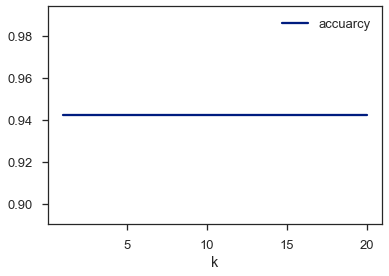

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));